# Laboratorio 1
Francisco Castillo

## ¿Cómo se resolvió la carga de datos?
Podemos observar que en el link de los datos está el nombre del conjunto de datos. Navegando internet encontramos un nuevo vínculo que contiene el conjunto de datos.

In [1]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## 0. Cargar los datos de estatura y peso


In [2]:
url = 'http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html'
df = pd.read_html(url, header=0)[0]

In [3]:
df = df.rename(columns={'Height(Inches)': 'Height', 'Weight(Pounds)': 'Weight'})
df.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


## 1. Contar el número de registros

In [4]:
print(f"Number of records: {df.shape[0]}")

Number of records: 25000


## 2. Crear una regresión lineal con estatura como variable explicatoria y peso como variable explicada

In [5]:
X = df[['Height']]
y = df['Weight']

In [6]:
linear_regression = linear_model.LinearRegression()

In [7]:
linear_regression.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 3. Hallar el intercepto

In [8]:
intercept = linear_regression.intercept_
print(f"Intercept: {intercept}")

Intercept: -82.57574306454079


## 4. Hallar la pendiente

In [9]:
slope = linear_regression.coef_[0]
print(f"Slope: {slope}")

Slope: 3.083476445402964


## 5. Hacer la predicción de peso para una persona de 70 pulgadas de altura

In [10]:
height = 70
test_height_df = pd.DataFrame({'Height': [height]})

In [11]:
predicted_weight = linear_regression.predict(test_height_df)[0]

In [12]:
print(f"Predicted weight for a person with height {height} inches: {predicted_weight:.2f} pounds")

Predicted weight for a person with height 70 inches: 133.27 pounds


### 5.1 MAE

In [13]:
predicted_weights = linear_regression.predict(X)

In [14]:
mae = mean_absolute_error(y, predicted_weights)
print(f"MAE: {mae:.2f} pounds")

MAE: 8.04 pounds


## 6. Hacer la gráfica

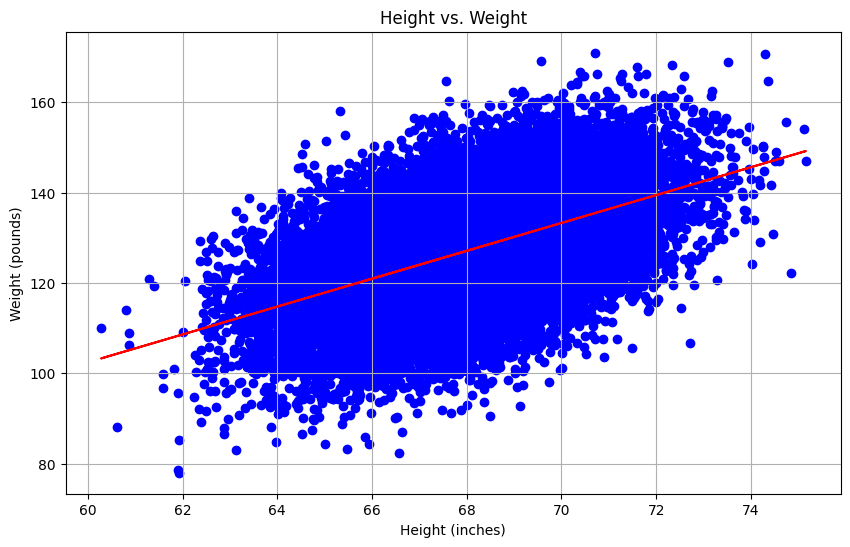

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Height'], df['Weight'], color='blue')
plt.plot(df['Height'], predicted_weights, color='red')
plt.title('Height vs. Weight')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.grid()
plt.show()

## 7. Hallar correlación y valor p

In [16]:
correlation, p_value = pearsonr(df['Height'], df['Weight'])
print(f"Correlation: {correlation}")
print(f"P-value: {p_value:.4f}")

Correlation: 0.5028585206028441
P-value: 0.0000


## 8. Interpretar el valor p

Se obtuvo una pendiente de 3.08 y una intersección en -82.58, lo que sugiere que por cada pulgada adicional de altura, el peso aumenta en promedio 3.08 libras. La correlación entre ambas variables fue de 0.50, indicando una relación lineal moderada entre la altura y el peso. El modelo presenta un error absoluto medio de 8.04 libras, lo que implica una desviación promedio relativamente considerable entre los valores predichos y los valores reales. Estos resultados reflejan que, aunque el modelo capta una tendencia general, no es altamente preciso para predicciones individuales; como podemos obervar en la gráfica.

El valor p evalúa la probabilidad de observar una relación entre altura y peso, asumiendo que en realidad no hay ninguna relación entre ambas variables (hipótesis nula). Un valor p de 0.0000 implica que la probabilidad de que la correlación observada haya ocurrido por azar es extremadamente baja (al ser p<0.05)

# 9. Responsible AI Badge

![Responsible AI Badge](badge.jpg)